In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, accuracy_score, plot_roc_curve, plot_confusion_matrix, roc_curve, confusion_matrix
import itertools
from tensorflow.keras.initializers import Constant, TruncatedNormal
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from numpy import mean, absolute


Models

In [14]:
metrics = pd.DataFrame(columns=['model', 'group', 'subgroup','Length', 'Sentence', 'Accuracy','loss', 'optimizer', 'metrics', 'Precision', 'Recall', 'AUC', 'FPR'])

In [16]:
optimizer = ['Adam','Adam','Adam','SGD','SGD','SGD','Adam','Adam','Adam','SGD','SGD','SGD']
loss = ["binary_crossentropy",'MeanSquaredError','Hinge',"binary_crossentropy",'MeanSquaredError','Hinge','binary_crossentropy','MeanSquaredError','Hinge','binary_crossentropy','MeanSquaredError','Hinge']
metrics_ = ['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','AUC','AUC','AUC','AUC','AUC','AUC']

# baseline model
def build_model():
	# create model
	model = Sequential()
	model.add(Dense(24, input_dim=24, activation='relu'))
	model.add(Dense(48, activation='relu'))
	model.add(Dense(24, activation='relu'))
	model.add(Dense(12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
		
	return model


def get_dn_metrics(model, X,y):
    yhat_probs = model.predict(X, verbose=0)
    yhat_classes =  (model.predict(X) > 0.5).astype("int32")
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]
    a = accuracy_score(y, yhat_classes)
    p = precision_score(y, yhat_classes)
    r = recall_score(y, yhat_classes)
    roc_auc = roc_auc_score(y, yhat_probs)
    tn, fp, fn, tp = confusion_matrix(y, yhat_classes).ravel()
    fpr = fp/(fp+tn)

    return a,p,r,roc_auc,fpr

for (loss, optimizer, metrics_) in zip(loss, optimizer, metrics_):

    n =  [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
    feature_cols = ['Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps']

    for i in n:
        path='AbiEltern_allsessions/matrix'+str(i)+'.pkl'
        infile = open(path,'rb')
        df = pickle.load(infile)
        infile.close()
        df=df.reset_index()

        y_len = len(feature_cols)
        X = df[feature_cols].astype(float)
        y = df.y
        y= y.astype('int')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        model = build_model()

        model.compile(
            loss=loss,
            optimizer=optimizer,
            metrics=[metrics_]
        )

        model.fit(
            x=X_train,
            y=y_train,
            epochs=10,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test)
        )

        scores = model.evaluate(
            x=X_test,
            y=y_test,
            verbose=0
        )

        a,p,r,roc_auc,fpr= get_dn_metrics(model, X_test,y_test)
        metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)

        group = ['abiEltern', 'abiEltern']
        subgroup = ['abi', 'keinAbi']
        matrice = ['matrices_forte_abi', 'matrices_forte_keinAbi']

        for (group, subgroup, matrix) in zip(group, subgroup, matrice):
            path= '../01_prognosemodell/06_newtry/'+matrix+'/matrix'+str(i)+'.pkl'
            infile = open(path,'rb')
            df = pickle.load(infile)
            infile.close()
            df=df.reset_index()
            y_len = len(feature_cols)
            X = df[feature_cols].astype(float)
            y = df.y
            y= y.astype('int')

            a,p,r,roc_auc,fpr= get_dn_metrics(model, X,y)

            metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)

65/65 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 970us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 939us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 953us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 796us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 966us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 976us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 843us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 788us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 793us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 947us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 966us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 822us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 824us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 832us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 788us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


266/266 [==============================] - 0s 931us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 848us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 926us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/110 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 930us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 977us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/85 [=====================>........] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 817us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 862us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


58/64 [==========================>...] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 947us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/63 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 920us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/106 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/103 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/92 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 845us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 992us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 839us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 839us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/70 [========================>.....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


58/64 [==========================>...] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 848us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


58/60 [============================>.] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 796us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 813us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 981us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 827us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 827us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 847us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 792us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 834us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':

11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 963us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 877us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 914us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 848us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 877us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 828us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 862us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/111 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/110 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 914us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 818us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 923us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 834us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 993us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


112/112 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 924us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/103 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


7/7 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 965us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 853us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/64 [========================>.....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 960us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/53 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 811us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 831us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 544us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 892us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

12/12 [==============================] - 0s 921us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 975us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 929us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 920us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 793us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 914us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 858us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 983us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


266/266 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 952us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


263/263 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 935us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 985us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 795us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/73 [========================>.....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 843us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 946us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


58/64 [==========================>...] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 911us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 746us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 826us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/106 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


7/7 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


70/70 [==============================] - 0s 955us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 751us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 856us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 792us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 770us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 955us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/53 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 790us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 848us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 943us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 812us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 837us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 812us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 871us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

8/8 [==============================] - 0s 935us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 922us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 862us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 786us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 926us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 992us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 970us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 807us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


266/266 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/110 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 796us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 816us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 924us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 943us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 984us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 975us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/66 [========================>.....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 947us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/63 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 951us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 926us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/106 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/103 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 801us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


7/7 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/70 [========================>.....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 920us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/53 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 968us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 968us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 949us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 853us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 815us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 974us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 957us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 926us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 777us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 938us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 811us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 951us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 814us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 948us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 856us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 959us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 952us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 817us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 837us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 837us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 847us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 962us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 818us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


270/270 [==============================] - 0s 968us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/111 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/110 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 968us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 856us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


61/64 [===========================>..] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/63 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 823us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 947us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 988us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 804us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/92 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 910us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

57/70 [=======================>......] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 811us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/64 [=========================>....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 936us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/48 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 827us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 697us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 931us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 943us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 944us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 893us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

11/11 [==============================] - 0s 900us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 825us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

8/8 [==============================] - 0s 905us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 831us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 974us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 899us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 821us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 840us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 938us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 911us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 932us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 861us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/111 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 914us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/110 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 819us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


201/201 [==============================] - 0s 904us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 894us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 854us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 895us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 929us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 920us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 954us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/66 [========================>.....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 847us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/63 [=========================>....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 993us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/106 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


7/7 [==============================] - 0s 996us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/78 [====================>.........] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/70 [=========================>....] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 822us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/60 [=======================>......] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/53 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/48 [..............................] - ETA: 0s

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 895us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

45/45 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 800us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 837us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 843us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

17/17 [==============================] - 0s 928us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 733us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 936us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 896us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

13/13 [==============================] - 0s 1ms/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 952us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 972us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 808us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 982us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 861us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 971us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 963us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 819us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 832us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 805us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 989us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 862us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 877us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 861us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 824us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 973us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


270/270 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/111 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


263/263 [==============================] - 0s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 926us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 932us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 821us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 758us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/63 [===========================>..] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 818us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/49 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 999us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/47 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 923us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


7/7 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/43 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 962us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 949us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 819us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/48 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 976us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 990us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 806us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 954us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/33 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 938us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 968us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/19 [>.............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 936us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':

10/10 [==============================] - 0s 995us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 812us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 923us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 995us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 859us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 989us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 831us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 956us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 965us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 936us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 931us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 989us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 814us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 986us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 953us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 975us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 832us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 843us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 986us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 828us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 861us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


270/270 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 946us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


266/266 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 969us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


263/263 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


216/216 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 941us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 956us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 834us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 961us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 970us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/63 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/56 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 858us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 858us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 973us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/92 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 938us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 918us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 825us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 845us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 847us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 981us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 838us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 831us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 813us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


3/3 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 931us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 955us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 932us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 948us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 802us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 926us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 972us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 946us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 936us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 956us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 923us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 964us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 987us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 998us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 960us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 805us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 832us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 948us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 891us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 838us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 877us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 911us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 951us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 924us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/111 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 829us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


263/263 [==============================] - 0s 971us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 860us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 921us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 943us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 981us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/66 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 800us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 786us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/63 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/56 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 975us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 827us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/103 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


7/7 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 950us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 793us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 787us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 853us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 779us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 944us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 935us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/53 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 950us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/48 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 952us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 827us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 839us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 963us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 893us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 955us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

33/33 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 382us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 954us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 912us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 831us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

12/12 [==============================] - 0s 1ms/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 823us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 937us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 944us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 824us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 963us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 967us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 947us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 945us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 914us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 938us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 946us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 858us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 892us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 960us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 837us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 819us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 985us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 897us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 838us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 853us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 976us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 936us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


270/270 [==============================] - 0s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 789us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 942us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/111 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 856us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/110 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 868us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 878us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 843us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 870us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/66 [==========================>...] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 952us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


61/63 [============================>.] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 837us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 777us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/103 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 899us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/92 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 794us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 869us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 856us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 845us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 929us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/53 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 853us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 848us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 902us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 847us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 820us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 956us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 877us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 960us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 999us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 939us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 881us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 973us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 861us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 924us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 907us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 885us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 960us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 988us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 951us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 990us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 861us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 903us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 853us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 914us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 962us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 829us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 911us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 963us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 848us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 916us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 890us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 962us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 830us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 937us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/113 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


266/266 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 852us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


263/263 [==============================] - 0s 954us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 3ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 887us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/73 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 934us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/66 [==========================>...] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 862us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 836us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/106 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/92 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/75 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 773us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/70 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 278us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 855us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 923us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 879us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 915us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 901us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 884us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 936us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 847us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 929us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 880us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 986us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 833us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 896us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 824us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 964us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 849us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


65/65 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


696/696 [==============================] - 1s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


252/252 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


62/62 [==============================] - 0s 908us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


687/687 [==============================] - 1s 876us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


249/249 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/60 [==============================] - 0s 911us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


682/682 [==============================] - 1s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


248/248 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


59/59 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


677/677 [==============================] - 1s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


245/245 [==============================] - 0s 894us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/57 [==============================] - 0s 933us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


671/671 [==============================] - 1s 889us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


243/243 [==============================] - 0s 928us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


55/55 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


666/666 [==============================] - 1s 925us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


242/242 [==============================] - 0s 957us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


54/54 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


662/662 [==============================] - 1s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


240/240 [==============================] - 0s 958us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 905us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


657/657 [==============================] - 1s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


238/238 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


52/52 [==============================] - 0s 828us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


652/652 [==============================] - 1s 841us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


236/236 [==============================] - 0s 820us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


41/41 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


493/493 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


187/187 [==============================] - 0s 951us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


40/40 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


487/487 [==============================] - 0s 840us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


186/186 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 972us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


483/483 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


184/184 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


38/38 [==============================] - 0s 872us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


478/478 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


182/182 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


371/371 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


149/149 [==============================] - 0s 922us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


30/30 [==============================] - 0s 895us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


363/363 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


146/146 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


29/29 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


359/359 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


145/145 [==============================] - 0s 971us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


355/355 [==============================] - 0s 871us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


143/143 [==============================] - 0s 953us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


23/23 [==============================] - 0s 950us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


283/283 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


118/118 [==============================] - 0s 874us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


270/270 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


113/113 [==============================] - 0s 845us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


266/266 [==============================] - 0s 940us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


111/111 [==============================] - 0s 929us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 851us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


263/263 [==============================] - 0s 844us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


110/110 [==============================] - 0s 951us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 813us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/93 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


93/93 [==============================] - 0s 909us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 817us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/87 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


87/87 [==============================] - 0s 854us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/85 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


85/85 [==============================] - 0s 882us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/83 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


83/83 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


60/73 [=======================>......] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


73/73 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 820us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/66 [===========================>..] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


66/66 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 904us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


64/64 [==============================] - 0s 917us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 927us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/63 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


63/63 [==============================] - 0s 883us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


56/56 [==============================] - 0s 959us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 863us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


51/51 [==============================] - 0s 873us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


49/49 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


  1/103 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


47/47 [==============================] - 0s 888us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/92 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


43/43 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 930us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/78 [..............................] - ETA: 1s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


37/37 [==============================] - 0s 842us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


6/6 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 786us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


57/70 [=======================>......] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


33/33 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/64 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/60 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 866us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


 1/57 [..............................] - ETA: 0s

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 763us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


53/53 [==============================] - 0s 893us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


25/25 [==============================] - 0s 906us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


48/48 [==============================] - 0s 817us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


24/24 [==============================] - 0s 845us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


45/45 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 857us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


42/42 [==============================] - 0s 812us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


21/21 [==============================] - 0s 922us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


39/39 [==============================] - 0s 850us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 913us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


36/36 [==============================] - 0s 868us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 904us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

33/33 [==============================] - 0s 886us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 875us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


31/31 [==============================] - 0s 846us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


28/28 [==============================] - 0s 864us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


15/15 [==============================] - 0s 898us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


26/26 [==============================] - 0s 825us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 846us/step


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

23/23 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


13/13 [==============================] - 0s 919us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


22/22 [==============================] - 0s 809us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


12/12 [==============================] - 0s 952us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


20/20 [==============================] - 0s 865us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


19/19 [==============================] - 0s 803us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


11/11 [==============================] - 0s 900us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


18/18 [==============================] - 0s 835us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


10/10 [==============================] - 0s 778us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


17/17 [==============================] - 0s 973us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


9/9 [==============================] - 0s 1ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


16/16 [==============================] - 0s 867us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 1000us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


14/14 [==============================] - 0s 812us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':'all','subgroup':'all','Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)
C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


8/8 [==============================] - 0s 910us/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5704\3984883457.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'model':'DL','group':group,'subgroup':subgroup,'Length':len(df),'Sentence': i, 'Accuracy':a,'loss':loss,'optimizer': optimizer,'metrics': metrics_,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


In [ ]:
metrics.to_pickle('abi_DL.pkl')

In [2]:
path='abi_DL.pkl'
infile = open(path,'rb')
metrics = pickle.load(infile)
infile.close()

Evaluate

In [3]:
df = metrics
grouped = df.groupby(df.group)
df_abiEltern = grouped.get_group("abiEltern")

df_abiEltern = df_abiEltern.drop(columns=['group', 'Accuracy','model'])
df_abiEltern = pd.pivot_table(df_abiEltern, values=["Precision","Recall","AUC","FPR"], index=['loss', 'optimizer', 'metrics', "Sentence"], columns=["subgroup"])
df_abiEltern['PP'] = df_abiEltern.Precision.abi-df_abiEltern.Precision.keinAbi
df_abiEltern['EO'] = df_abiEltern.Recall.keinAbi-df_abiEltern.Recall.abi
df_abiEltern['SA'] = df_abiEltern.AUC.abi-df_abiEltern.AUC.keinAbi
df_abiEltern['PE'] = df_abiEltern.FPR.keinAbi-df_abiEltern.FPR.abi
df_abiEltern = df_abiEltern.drop(columns=['AUC','Precision','Recall','FPR'])
df_abiEltern.columns = df_abiEltern.columns.droplevel(1)
df_abiEltern = pd.pivot_table(df_abiEltern, values=["PP","EO","SA","PE"], index=["Sentence"], columns=['loss', 'optimizer', 'metrics'])



In [4]:
test = df_abiEltern
met = ['EO','PE','PP','SA']
fertig = pd.DataFrame()

optimizer = ['Adam','Adam','Adam','SGD','SGD','SGD','Adam','Adam','Adam','SGD','SGD','SGD']
loss = ["binary_crossentropy",'MeanSquaredError','Hinge',"binary_crossentropy",'MeanSquaredError','Hinge','binary_crossentropy','MeanSquaredError','Hinge','binary_crossentropy','MeanSquaredError','Hinge']
metrics_ = ['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','AUC','AUC','AUC','AUC','AUC','AUC']

for (loss, optimizer, metrics_) in zip(loss, optimizer, metrics_):

    for x in met: 
        a=0
        for i in range(2, 10):
            a = a+test[x][loss][optimizer][metrics_][i]
        a = a/8
        temp = pd.DataFrame(
            {
                'Metrik':[x],
                'Model': 'DL',
                'Range': '02-9',
                'Val': a,
                'loss':loss,
                'optimizer':optimizer,
                'metrics_':metrics_
            }
        )
        fertig = pd.concat([fertig, temp])

        b = 0
        for i in range(10, 20):
            b = b+test[x][loss][optimizer][metrics_][i]
        b = b/9
        temp = pd.DataFrame(
            {
                'Metrik':[x],
                'Model': 'DL',
                'Range': '10-19',
                'Val': b,             
                'loss':loss,
                'optimizer':optimizer,
                'metrics_':metrics_
            }
        )
        fertig = pd.concat([fertig, temp])

        c = 0
        for i in range(20, 30):
            c = c+test[x][loss][optimizer][metrics_][i]
        c = c/9
        temp = pd.DataFrame(
            {
                'Metrik':[x],
                'Model': 'DL',
                'Range': '20-29',
                'Val': c,
                'loss':loss,
                'optimizer':optimizer,
                'metrics_':metrics_
            }
        )
        fertig = pd.concat([fertig, temp])

        d = 0
        for i in range(30, 40):
            d = d+test[x][loss][optimizer][metrics_][i]
        d = d/9
        temp = pd.DataFrame(
            {
                'Metrik':[x],
                'Model': 'DL',
                'Range': '30-39',
                'Val': d,
                'loss':loss,
                'optimizer':optimizer,
                'metrics_':metrics_
            }
        )
        fertig = pd.concat([fertig, temp])

        e = 0
        for i in range(40, 50):
            e = e+test[x][loss][optimizer][metrics_][i]
        e = e/9
        temp = pd.DataFrame(
            {
                'Metrik':[x],
                'Model': 'DL',
                'Range': '40-49',
                'Val': e,
                'loss':loss,
                'optimizer':optimizer,
                'metrics_':metrics_
            }
        )
        fertig = pd.concat([fertig, temp])

        f = 0
        for i in range(50, 60):
            f = f+test[x][loss][optimizer][metrics_][i]
        f = f/10
        temp = pd.DataFrame(
            {
                'Metrik':[x],
                'Model': 'DL',
                'Range': '50-60',
                'Val': f,
                'loss':loss,
                'optimizer':optimizer,
                'metrics_':metrics_
            }
        )
        fertig = pd.concat([fertig, temp])


In [5]:
#format result

def threshold001(v, props=''):
    return props if (v > 0.02) or (v < -0.02) else None

def threshold005(v, props=''):
    return props if (v > 0.05) or (v < -0.05) else None

def negativeValue(v, props=''):
    return props if (v < 0) else None

def showTable(df):
    styled = df.style.set_properties(color="black", align="right")\
        .set_properties(**{'background-color': 'white'})\
        .applymap(threshold001, props='color:orange;')\
        .applymap(threshold005, props='color:red;')\
        .applymap(negativeValue, props='font-weight:bold;')
    return styled

In [6]:
mean_table = pd.pivot_table(fertig, values=['Val'], index=['loss', 'optimizer', 'metrics_','Range'], columns=['Metrik','Model'])
showTable(mean_table)

In [8]:
metrics

,model,group,subgroup,Length,Sentence,Accuracy,loss,optimizer,metrics,Precision,Recall,AUC,FPR
0,DL,all,all,6840,2,0.754873,binary_crossentropy,Adam,Accuracy,0.722274,0.790816,0.815117,0.277985
1,DL,abiEltern,abi,22257,2,0.766096,binary_crossentropy,Adam,Accuracy,0.952435,0.77173,0.818128,0.273953
2,DL,abiEltern,keinAbi,8040,2,0.750249,binary_crossentropy,Adam,Accuracy,0.952897,0.751388,0.812367,0.257651
3,DL,all,all,6548,3,0.75369,binary_crossentropy,Adam,Accuracy,0.736045,0.791455,0.833211,0.284114
4,DL,abiEltern,abi,21979,3,0.775195,binary_crossentropy,Adam,Accuracy,0.958964,0.780034,0.829891,0.262924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,DL,abiEltern,abi,482,59,0.956432,Hinge,SGD,AUC,0.956432,1.0,0.655407,1.0
2651,DL,abiEltern,keinAbi,252,59,0.944444,Hinge,SGD,AUC,0.944444,1.0,0.748499,1.0
2652,DL,all,all,116,60,0.828571,Hinge,SGD,AUC,0.84375,0.964286,0.897959,0.714286
2653,DL,abiEltern,abi,446,60,0.957399,Hinge,SGD,AUC,0.963387,0.992925,0.916166,0.727273


In [9]:
grouped = metrics.groupby(metrics.group)
df_all = grouped.get_group("all")
modell = df_all.groupby(df_all.loss)
five = modell.get_group('MeanSquaredError')
n = five.groupby(five.optimizer)
n = n.get_group('Adam')
f = n.groupby(n.metrics)
f = f.get_group('Accuracy')

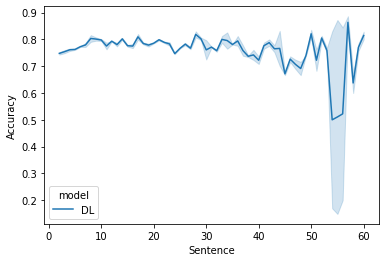

In [10]:
ax = sns.lineplot(data=f, x='Sentence', y='Accuracy', hue='model')